# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [9]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-10-24 01:56:25--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv.2’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-10-24 01:56:25 (42.0 MB/s) - ‘Social_Network_Ads.csv.2’ saved [10926/10926]



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [23]:
# Mostrar las primeras filas

print("Primeras 5 filas del dataset:")
print(data.head())

Primeras 5 filas del dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [24]:
# Información general del dataset


print("\nInformación general del dataset:")
print(data.info())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

Variables del dataset:
User ID: Identificador único del usuario, sin valor predictivo.
Gender: Género del usuario (Male/Female), podría tener cierta influencia pero no determinante.
Age: Edad del usuario, variable clave para el comportamiento de compra.
EstimatedSalary: Ingreso estimado del usuario, importante para estimar poder adquisitivo.
Purchased: Variable objetivo binaria (0 = No compró, 1 = Compró).
Reflexión:
Para este análisis, Age y EstimatedSalary son las variables más relevantes, ya que reflejan factores directamente relacionados con la decisión de compra.

## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

/tmp/ipython-input-3357134988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=data, palette='Set2')


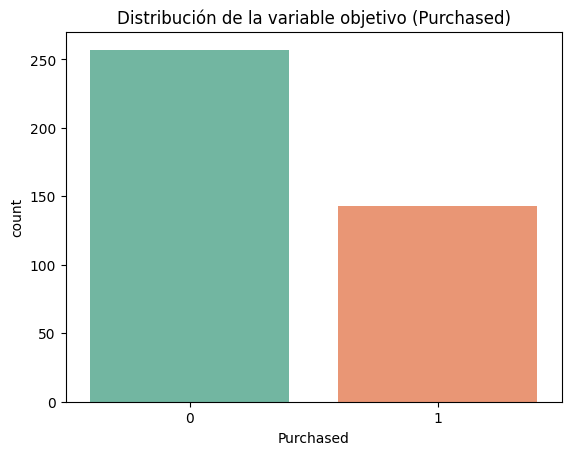

,proportion
Purchased,
0,0.6425
1,0.3575


In [15]:
# Visualización de la distribución de la variable objetivo
sns.countplot(x='Purchased', data=data, palette='Set2')
plt.title('Distribución de la variable objetivo (Purchased)')
plt.show()

# Mostrar valores de conteo
data['Purchased'].value_counts(normalize=True)


## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

La variable Purchased muestra un leve desbalance, con más usuarios que no compran (0) que los que sí (1).
Este desbalance puede provocar que el modelo aprenda a favorecer la clase mayoritaria, reduciendo su capacidad para detectar correctamente los casos positivos.
Estrategias para mitigar el desbalance:
Aplicar técnicas de re-muestreo (submuestreo o sobremuestreo).
Utilizar métricas que compensen el desbalance (por ejemplo, F1 o ROC-AUC).
Aplicar métodos como SMOTE para balancear el conjunto de entrenamiento (en proyectos más complejos).

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

Variables seleccionadas: Age y EstimatedSalary.
Razonamiento:
La edad y el salario estimado son variables que reflejan el perfil socioeconómico del usuario, lo cual influye en la probabilidad de adquirir un producto o servicio.
Es razonable pensar que las personas con mayor salario o dentro de ciertos rangos de edad son más propensas a comprar.

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [16]:
from sklearn.model_selection import train_test_split

# Selección de variables
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# División con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Tamaños de los subconjuntos
X_train.shape, X_test.shape


((300, 2), (100, 2))

Ventajas de la estratificación:
Mantiene la misma proporción de clases en entrenamiento y prueba, evitando sesgos.
Asegura una mejor representatividad del dataset.
Mejora la confiabilidad de las métricas de evaluación.

## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Modelo sin restricciones
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones
y_pred = tree_model.predict(X_test)


Entrenar un árbol sin limitar la profundidad permite que el modelo aprenda todas las divisiones posibles, alcanzando una complejidad muy alta.
Esto puede generar sobreajuste (overfitting), ya que el árbol memoriza los datos de entrenamiento en lugar de generalizar patrones útiles.

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

Exactitud: 0.89
Precisión: 0.8378378378378378
Recall: 0.8611111111111112
F1 Score: 0.8493150684931506


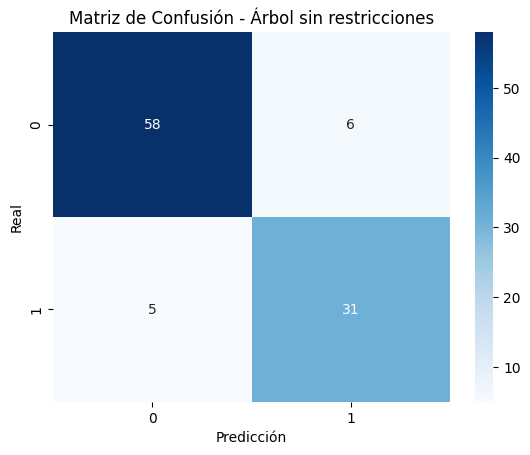


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.84      0.86      0.85        36

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Métricas de evaluación
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Árbol sin restricciones")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


La matriz de confusión permite observar cuántas predicciones fueron correctas o incorrectas:
Verdaderos positivos (TP): compras correctamente identificadas.
Falsos negativos (FN): casos de compra que el modelo no detectó.
Falsos positivos (FP): usuarios clasificados como compradores sin serlo.
Verdaderos negativos (TN): usuarios no compradores correctamente clasificados.
Así se puede analizar qué tipo de error es más común y ajustar el modelo según la prioridad (por ejemplo, minimizar falsos negativos).

## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

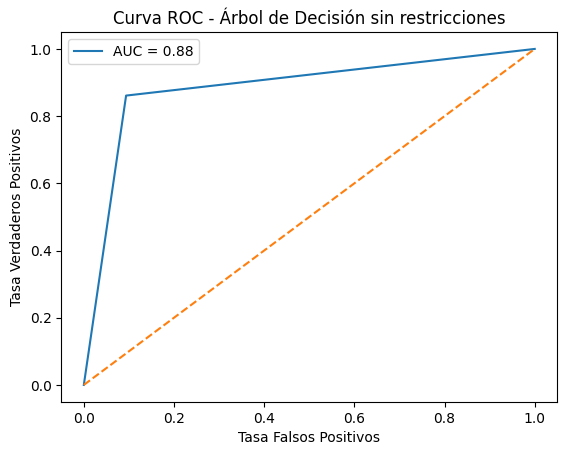

In [19]:
from sklearn.metrics import roc_curve, auc

# Probabilidades
y_proba = tree_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Curva ROC - Árbol de Decisión sin restricciones")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.legend()
plt.show()


La curva ROC representa la capacidad del modelo para diferenciar entre las clases.
Un AUC alto (cercano a 1) indica que el modelo tiene una excelente capacidad de discriminación.
Un AUC bajo (cercano a 0.5) sugiere que el modelo no diferencia mejor que el azar.

## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

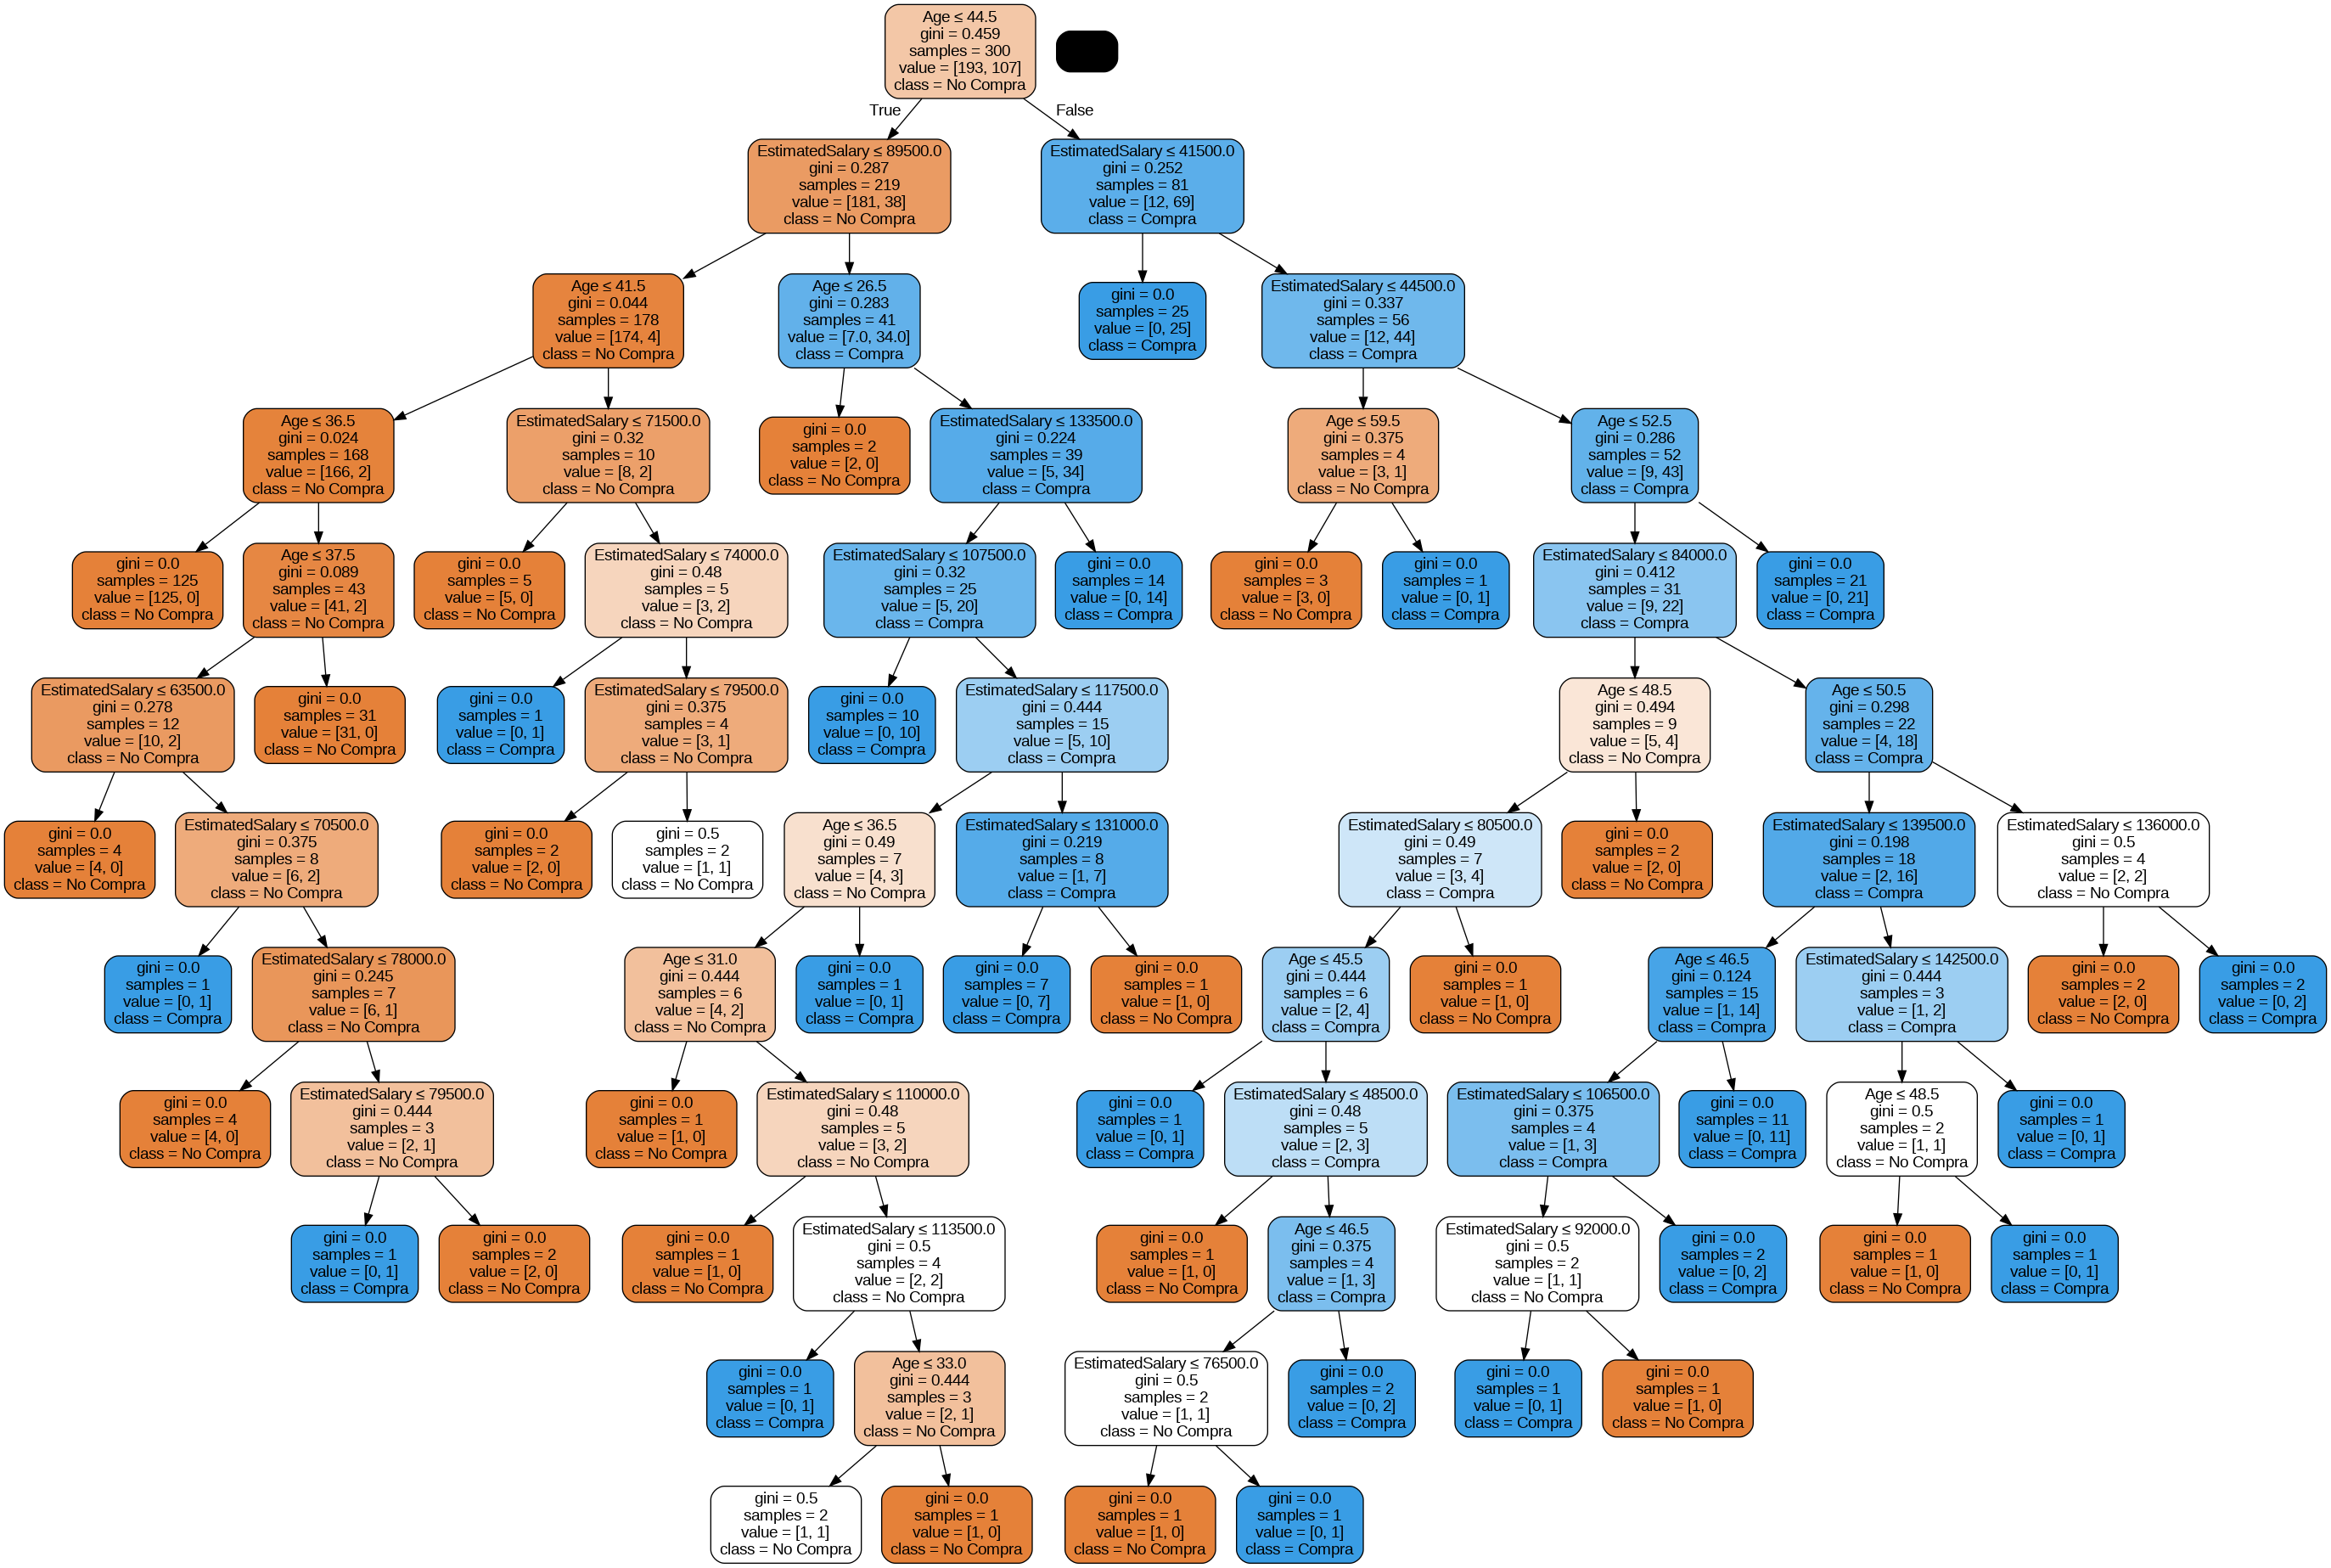

In [20]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Exportar el árbol
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['No Compra', 'Compra'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualizar
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


Regla del primer nodo: Es la variable y el umbral que mejor separa las clases (por ejemplo, “Age ≤ 42.5”).
Ramas: Representan decisiones basadas en las condiciones de las variables.
Hojas: Muestran la clase final (0 o 1) y la proporción de ejemplos que llegan a ese punto.
Sobreajuste: Se refleja en ramas con pocos datos o reglas muy específicas que no generalizan bien.

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

El modelo sin restricciones probablemente muestra un rendimiento muy alto en entrenamiento, pero más bajo en prueba, señal clara de sobreajuste.
Para mejorar la generalización se pueden:
Limitar la profundidad (max_depth).
Ajustar parámetros como min_samples_split o min_samples_leaf.
Aplicar técnicas de poda (pruning).

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

Exactitud: 0.89
Precisión: 0.8571428571428571
Recall: 0.8333333333333334
F1 Score: 0.8450704225352113


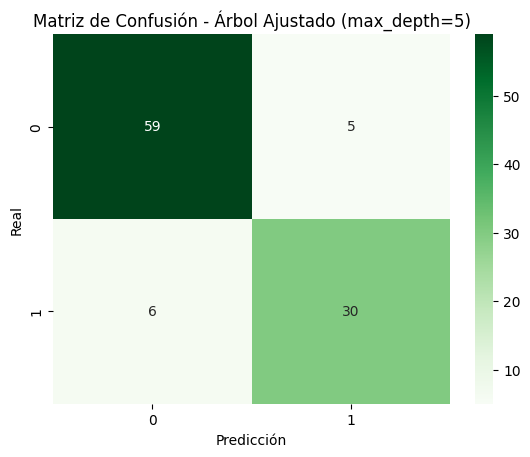

In [21]:
# Modelo ajustado con profundidad máxima de 5
tree_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_pruned.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_pruned = tree_model_pruned.predict(X_test)

print("Exactitud:", accuracy_score(y_test, y_pred_pruned))
print("Precisión:", precision_score(y_test, y_pred_pruned))
print("Recall:", recall_score(y_test, y_pred_pruned))
print("F1 Score:", f1_score(y_test, y_pred_pruned))

# Matriz de confusión
cm2 = confusion_matrix(y_test, y_pred_pruned)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Árbol Ajustado (max_depth=5)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Al limitar la profundidad, el árbol se vuelve más simple y generalizable.
Aunque puede perder algo de precisión, el modelo suele mejorar su rendimiento en datos nuevos, reduciendo el sobreajuste.

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

In [22]:
# Comparación rápida de métricas
metrics = pd.DataFrame({
    'Modelo': ['Sin restricciones', 'Ajustado (max_depth=5)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_pruned)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_pruned)
    ]
})

metrics


,Modelo,Accuracy,F1 Score
0,Sin restricciones,0.89,0.849315
1,Ajustado (max_depth=5),0.89,0.845070


El modelo ajustado con profundidad controlada ofrece un mejor equilibrio entre precisión y generalización.
El modelo sin restricciones tiende a sobreajustar los datos de entrenamiento.
En comparación, una Regresión Logística serviría como modelo base (baseline), útil para verificar si el árbol realmente mejora el desempeño.
En conclusión, el árbol ajustado es preferible en términos de interpretabilidad, estabilidad y capacidad de generalización.